In [1]:
!pip install scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=8b8a12a090b75f481cf13e11d4ebaf78efd8caeeacda428d3a1124d5eb27adc8
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\2c\04\80\7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [1]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control
import matplotlib.pyplot as plt

# Penentuan Fungsi Keanggotaan

In [2]:
suhu = np.arange(0, 51, 1) #max 50
ph = np.arange(0, 15, 1) #max 14
oksigen_larut = np.arange(0, 5, 0.5) #max 5
kualitas_air = np.arange(0, 1.1, 0.1) #max 1

In [3]:
suhu_dingin = fuzzy.trimf(suhu, [0, 0, 25])
suhu_hangat = fuzzy.trapmf(suhu, [0, 25, 30, 50])
suhu_panas = fuzzy.trimf(suhu, [30, 50, 50])

In [4]:
ph_asam = fuzzy.trimf(ph, [0, 0, 7])
ph_netral = fuzzy.trapmf(ph, [0, 7, 9, 14])
ph_basa = fuzzy.trimf(ph, [9, 14, 14])

In [5]:
ol_kurang = fuzzy.trimf(oksigen_larut, [0, 0, 1.5])
ol_cukup = fuzzy.trapmf(oksigen_larut, [0, 1.5, 5, 5])

In [6]:
ka_buruk = fuzzy.trimf(kualitas_air, [0, 0, 1])
ka_baik = fuzzy.trimf(kualitas_air, [0, 1, 1])

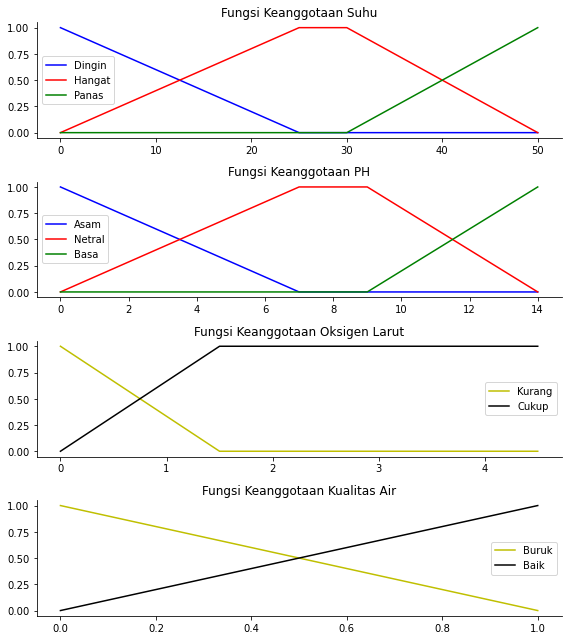

In [47]:
axg, (FK1, FK2, FK3, FK4) = plt.subplots(nrows=4, figsize=(8,9))

FK1.plot(suhu, suhu_dingin, 'b', linewidth=1.5, label='Dingin')
FK1.plot(suhu, suhu_hangat, 'r', linewidth=1.5, label='Hangat')
FK1.plot(suhu, suhu_panas, 'g', linewidth=1.5, label='Panas')
FK1.set_title('Fungsi Keanggotaan Suhu')
FK1.legend()

FK2.plot(ph, ph_asam , 'b', linewidth=1.5, label='Asam')
FK2.plot(ph, ph_netral, 'r', linewidth=1.5, label='Netral')
FK2.plot(ph, ph_basa, 'g', linewidth=1.5, label='Basa')
FK2.set_title('Fungsi Keanggotaan PH')
FK2.legend()

FK3.plot(oksigen_larut, ol_kurang, 'y', linewidth=1.5, label='Kurang')
FK3.plot(oksigen_larut, ol_cukup, 'k', linewidth=1.5, label='Cukup')
FK3.set_title('Fungsi Keanggotaan Oksigen Larut')
FK3.legend()

FK4.plot(kualitas_air, ka_buruk, 'y', linewidth=1.5, label='Buruk')
FK4.plot(kualitas_air, ka_baik, 'k', linewidth=1.5, label='Baik')
FK4.set_title('Fungsi Keanggotaan Kualitas Air')
FK4.legend()

for ax in (FK1, FK2, FK3, FK4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Fuzzifikasi

In [8]:
#fungsi keanggotaan Suhu
def SUHU(value):
    f_suhu_dingin = fuzzy.interp_membership(suhu, suhu_dingin, value)
    f_suhu_hangat = fuzzy.interp_membership(suhu, suhu_hangat, value)
    f_suhu_panas = fuzzy.interp_membership(suhu, suhu_panas, value)
    
    return f_suhu_dingin, f_suhu_hangat, f_suhu_panas

#fungsi keanggotaan PH
def PH(value):
    f_ph_asam = fuzzy.interp_membership(ph, ph_asam, value)
    f_ph_netral = fuzzy.interp_membership(ph, ph_netral, value)
    f_ph_basa = fuzzy.interp_membership(ph, ph_basa, value)
    
    return f_ph_asam, f_ph_netral, f_ph_basa

def OL(value):
    f_ol_kurang = fuzzy.interp_membership(oksigen_larut, ol_kurang, value)
    f_ol_cukup = fuzzy.interp_membership(oksigen_larut, ol_cukup, value)
    
    return f_ol_kurang, f_ol_cukup


In [9]:
fuzzy_suhu = SUHU(30)
fuzzy_ph = PH(12)
fuzzy_ol = OL(1.1)

print("Suhu : ", fuzzy_suhu)
print("PH : ", fuzzy_ph)
print("OL : ", fuzzy_ol)

Suhu :  (0.0, 1.0, 0.0)
PH :  (0.0, 0.4, 0.6)
OL :  (0.2666666666666666, 0.7333333333333334)


# Rule

In [13]:
r = []
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[0], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[1], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[2], fuzzy_ol[0])))

r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[0], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[1], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[2], fuzzy_ol[1])))

r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[0], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[1], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[2], fuzzy_ol[0])))

r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[0], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[1], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[2], fuzzy_ol[1])))

r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[0], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[1], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[2], fuzzy_ol[0])))

r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[0], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[1], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[2], fuzzy_ol[1])))

r

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2666666666666666,
 0.2666666666666666,
 0.0,
 0.4,
 0.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Mamdani

In [18]:
a_act = []
for i in range(len(r)):
    a_act.append(np.fmin(r[i], ka_buruk))

activation_ka = np.zeros_like(kualitas_air)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.26666667,
        0.26666667, 0.26666667, 0.26666667, 0.2       , 0.1       ,
        0.        ]),
 array([0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.26666667,
        0.26666667, 0.26666667, 0.26666667, 0.2       , 0.1       ,
        0.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1, 0. ]),
 array([0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0.

Text(0.5, 1.0, ' Penggabungan Fungsi Anggota ')

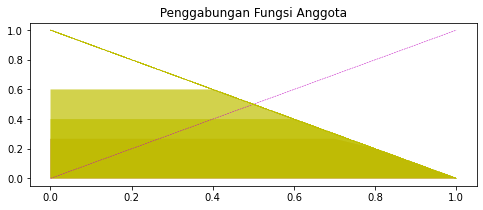

In [20]:
fig, vis = plt.subplots(figsize = (8,3))
for i in range(len(a_act)):
    if i == 7:
        vis.fill_between(kualitas_air,activation_ka, a_act[i], facecolor = 'm', alpha=0.7)
        vis.plot(kualitas_air, ka_baik, 'm', linewidth=0.5, linestyle='--')
    else:
        vis.fill_between(kualitas_air,activation_ka, a_act[i], facecolor = 'y', alpha=0.7)
        vis.plot(kualitas_air, ka_buruk, 'y', linewidth=0.5, linestyle='--')
vis.set_title(" Penggabungan Fungsi Anggota ")

# for ax in (vis, ):
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.get_xaxis().tick_buttom()
#     ax.get_yaxis().tick_left()

# plt.tight_layout()

In [21]:
aggregated = np.fmax(a_act[0], 
            np.fmax(a_act[1], 
            np.fmax(a_act[2],
            np.fmax(a_act[3],
            np.fmax(a_act[4],
            np.fmax(a_act[5],
            np.fmax(a_act[6],
            np.fmax(a_act[7], 
            np.fmax(a_act[8],
            np.fmax(a_act[9],
            np.fmax(a_act[10],
            np.fmax(a_act[11],
            np.fmax(a_act[12],
            np.fmax(a_act[13],
            np.fmax(a_act[14],
            np.fmax(a_act[15],
            np.fmax(a_act[16],a_act[17])))))))))))))))))

## Defuzzyfikasi Mamdani

In [22]:
KA = fuzzy.defuzz(kualitas_air, aggregated, 'mom')
KA_activation = fuzzy.interp_membership(kualitas_air, aggregated, KA)

Text(0.5, 1.0, 'Hasil Mamdani adalah ')

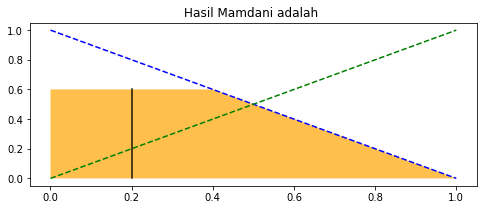

In [23]:
fig, vis = plt.subplots(figsize=(8,3))
vis.plot(kualitas_air, ka_buruk, 'b', linewidth=1.5, linestyle='--')
vis.plot(kualitas_air, ka_baik, 'g', linewidth=1.5, linestyle='--')
vis.fill_between(kualitas_air, activation_ka, aggregated, facecolor="Orange", alpha=0.7)
vis.plot([KA, KA], [0, KA_activation], 'k', linewidth=1.5, alpha=0.9)
vis.set_title("Hasil Mamdani adalah ")

In [24]:
def Kualitas_Air(value):
    if value > 0.5 :
        return print("Kualitas Air adalah Baik,  dengan kualitas air : ", value)
    else:
        return print("Kualitas Air adalah Buruk, dengan kualitas air : ", value)

Kualitas_Air(KA)

Kualitas Air adalah Buruk, dengan kualitas air :  0.2


# Tsukamoto

In [40]:
max = 1
min = 0
selisih = max - min

In [41]:
r = []
z = []

r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[0], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[1], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[2], fuzzy_ol[0])))

r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[0], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[1], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[0], np.fmin(fuzzy_ph[2], fuzzy_ol[1])))

r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[0], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[1], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[2], fuzzy_ol[0])))

r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[0], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[1], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[1], np.fmin(fuzzy_ph[2], fuzzy_ol[1])))

r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[0], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[1], fuzzy_ol[0])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[2], fuzzy_ol[0])))

r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[0], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[1], fuzzy_ol[1])))
r.append(np.fmin(fuzzy_suhu[2], np.fmin(fuzzy_ph[2], fuzzy_ol[1])))

r


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2666666666666666,
 0.2666666666666666,
 0.0,
 0.4,
 0.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [42]:
def hitungTsukamotoTurun(r):
    z.append(max - (selisih*r))
def hitungTsukamotoNaik(r):
    z.append(min + (selisih*r))

In [43]:
for i in range(len(r)):
    if i == 7:
        hitungTsukamotoNaik(r[i])
    else:
        hitungTsukamotoTurun(r[i])

In [44]:
z_t = 0
apred_t = 0

for i in range(len(r)):
    z_t += (z[i]*r[i])
    apred_t += r[i]

HA = z_t / apred_t
HA

0.4869565217391304

# SUGENO